In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,8,84620.05366
1,11,142591.25590
2,28,97800.25540
3,29,96834.67128
4,25,132157.78620


In [ ]:
print(df.shape)

(1000, 2)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  1000 non-null   int64  
 1   Salary           1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB
None


In [ ]:
print(df.describe())

       YearsExperience         Salary
count      1000.000000    1000.000000
mean         14.771000  105558.404238
std           8.341111   28256.972074
min           1.000000   33510.510670
25%           7.000000   85032.141520
50%          15.000000  104314.518300
75%          22.000000  126804.047550
max          29.000000  193016.602100


In [ ]:
x=df.iloc[:,0]
y=df.iloc[:,1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 1)
(200, 1)
(800,)
(200,)


In [ ]:
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [ ]:
regressor = SVR(kernel='linear', C=100, epsilon=0.1)
regressor.fit(X_train, y_train)

SVR(C=100, kernel='linear')

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 21937.48794884769
MSE: 718561253.0039871
RMSE: 26805.992856150417
R2 Score: 0.11997809718854313


In [ ]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

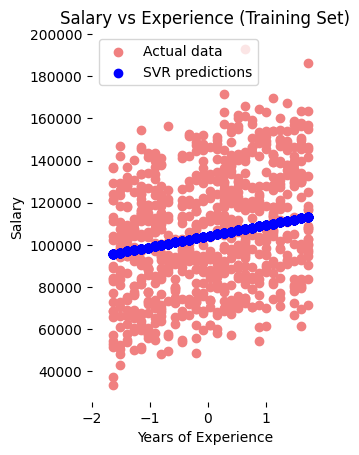

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='lightcoral', label='Actual data')
plt.scatter(X_train, regressor.predict(X_train), color='blue', label='SVR predictions')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.xticks(np.arange(-2, 2, 1))
plt.legend()
plt.box(False)

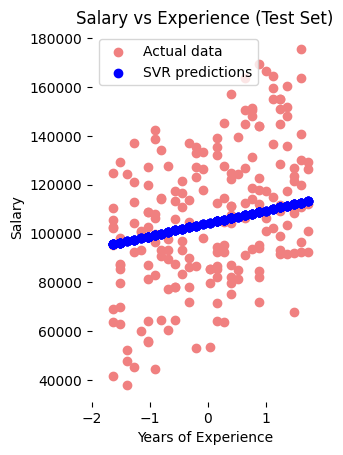

In [ ]:

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='lightcoral', label='Actual data')
plt.scatter(X_test, y_pred, color='blue', label='SVR predictions')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.xticks(np.arange(-2, 2, 1))
plt.legend()
plt.box(False)

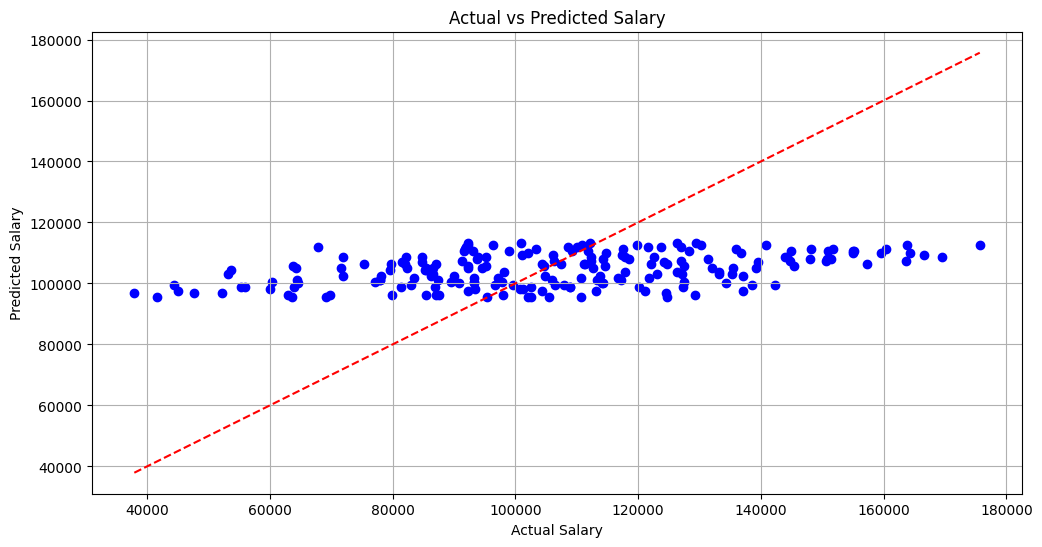

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.grid(True)
plt.show()


In [ ]:
from sklearn import linear_model

model_linear = linear_model.LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions_linear = model_linear.predict(X_test)

In [ ]:
model_linear.score(X_test, y_test)

0.17234957251912697